### data analysis explination

In [ ]:
import get_data
from get_data import genepy_df
from get_data import genepy_bin_95, genepy_bin_99, IBDU_bin_99, IBDU_bin_95, UC_CD_bin_99, UC_CD_bin_95, NOT_IBD_95, NOT_IBD_99, CD_bin_95, CD_bin_97_5, CD_bin_99, UC_bin_95, UC_bin_97_5, UC_bin_99
import get_network_analysis
import get_patient_networks

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import networkx as nx
import seaborn as sns

## Histograms to show percentiles

In [ ]:
NOD2_series = genepy_df["NOD2"]
n, bins, patches = plt.hist(NOD2_series)


plt.xlabel('GenePy Score')
plt.ylabel('Frequency of patients')
plt.title('Histogram of NOD2 GenePy scores')
plt.xlim(0, 11)
plt.ylim(0, 1100)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NOD2"],95), color='r')
plt.text(2.5, 650, r'percentile=95th', color='r')
plt.axvline(np.percentile(genepy_df["NOD2"],99), color='g')
plt.text(7.8, 650, r'percentile=99th', color='g')
plt.show()
# plt.savefig("NOD2_Percentile.png",dpi=300)

In [ ]:
NME9_series = genepy_df["NME9"]
n, bins, patches = plt.hist(NME9_series)


plt.xlabel('GenePy Score')
plt.ylabel('Frequency of patients')
plt.title('Histogram of NME9 GenePy scores')
plt.xlim(0, 8)
plt.ylim(0, 1100)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NME9"],95), color='r')
plt.text(1.7, 400, r'95th percentile is at 0, only 12 patients with a score', color='r')
plt.axvline(np.percentile(genepy_df["NME9"],99), color='g')
plt.text(1.7, 650, r'percentile=99th', color='g')
plt.show()
# plt.savefig("NME9_Percentile.png",dpi=300)


In [ ]:
np.percentile(genepy_df["NME9"],95)

In [ ]:
genepy_df["NME9"].sort_values(ascending=False).head(30)

In [ ]:
np.percentile(genepy_df["NOD2"],95)

In [ ]:
genepy_df["NOD2"].sort_values(ascending=False).head(40)

In [ ]:
binerised.get_top_bin_sum(UC_bin_95)

In [ ]:
genepy_bin_99['NOD2'].sum()

In [ ]:
UC_sum = NOT_IBD_99.sum().sort_values(ascending=False)
UC_sum['NME9']

In [ ]:
CD_bin_95.iloc[1][CD_bin_95.iloc[1]>0]

In [ ]:
CD_bin_95.isna().values.any()

In [ ]:
directory = "patient_networks/CD_95_network_3/"

CD_95_gl = get_network_analysis.create_graph_list_from_directory(directory)

## Draw in cytoscape

In [23]:
import py4cytoscape as py4

dir(py4)
py4.cytoscape_ping()
py4.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.3.0',
 'py4cytoscapeVersion': '0.0.11'}

In [ ]:
def view_networkx_in_cytoscape(graph):
    nx.cyctoscape_data(graph)

In [ ]:
py4.create_network_from_networkx(AP0030_G)

In [29]:
import json

with open('UC_99_MG.js', 'w') as outfile:
    json.dump(nx.cytoscape_data(UC_99_MG), outfile)

In [ ]:
def create_multigraph_network_in_cytoscape(multigraph):
    list4 = []
    for u, v, data in CD_95_MG.edges.data():
        list4.append([u, v, data['name'], data['weight']])
    
    df = pd.DataFrame(list4)
    df['4'] = 'CD'
    df['5'] = 'pp'
    df.columns = ['source', 
                  'target',
                  'patientID', 
                  'weight',
                  'diagnosis',
                  'interaction']
    return py4.create_network_from_data_frames(edges=df)
    

In [49]:
list4 = []
for u, v, data in CD_95_MG.edges.data():
    list4.append([u,v,data['name'],data['weight']])


In [51]:
df = pd.DataFrame(list4)

In [56]:
df['4'] = 'CD'

In [58]:
df['5'] = 'pp'

In [61]:
df

,0,1,2,3,4,5
0,ABCA12,ALOXE3,SOPR0448,0.814,CD,pp
1,ABCA12,ALOXE3,PR0078,0.814,CD,pp
2,ABCA12,ALOXE3,SOPR0407,0.814,CD,pp
3,ABCA12,CYP4F22,SOPR0300,0.839,CD,pp
4,ABCA12,TGM1,SOAP0323,0.832,CD,pp
...,...,...,...,...,...,...
38222,MAPK8,RIPK2,SOAD0584,0.866,CD,pp
38223,CTBP1,CTNNB1,SOPR0265,0.993,CD,pp
38224,HTN3,ZNF91,SOPR0407,0.923,CD,pp
38225,PLRG1,PRPF40B,SOPR0289,0.854,CD,pp


In [62]:
df.columns = ['source', 'target','patientID', 'weight', 'diagnosis', 'interaction']
df

,source,target,patientID,weight,diagnosis,interaction
0,ABCA12,ALOXE3,SOPR0448,0.814,CD,pp
1,ABCA12,ALOXE3,PR0078,0.814,CD,pp
2,ABCA12,ALOXE3,SOPR0407,0.814,CD,pp
3,ABCA12,CYP4F22,SOPR0300,0.839,CD,pp
4,ABCA12,TGM1,SOAP0323,0.832,CD,pp
...,...,...,...,...,...,...
38222,MAPK8,RIPK2,SOAD0584,0.866,CD,pp
38223,CTBP1,CTNNB1,SOPR0265,0.993,CD,pp
38224,HTN3,ZNF91,SOPR0407,0.923,CD,pp
38225,PLRG1,PRPF40B,SOPR0289,0.854,CD,pp


In [63]:
py4.create_network_from_data_frames(edges=df)

Applying default style...
Applying preferred layout


{'networkSUID': 128538}

In [ ]:
py4.sandbox.sandbox_send_to("UC_99_MG.js")
py4.import_network_from_file("UC_99_MG.js")

In [28]:
py4.network_views.fit_content()

{}

## Node Degree

In [3]:
import get_network_analysis
import networkx as nx


### Create graph lists

In [70]:
# functional
CD_95_GL = get_network_analysis.create_graph_list_from_directory("patient_networks/CD_95_network_3/")
UC_95_GL = get_network_analysis.create_graph_list_from_directory("patient_networks/UC_95_network_3/")

CD_99_GL = get_network_analysis.create_graph_list_from_directory("patient_networks/CD_99_network_3/")
UC_99_GL = get_network_analysis.create_graph_list_from_directory("patient_networks/UC_99_network_3/")

In [71]:
from get_network_analysis import get_edges_with_weight_in_graph_list

get_edges_with_weight_in_graph_list(CD_95_GL)
get_edges_with_weight_in_graph_list(UC_95_GL)

get_edges_with_weight_in_graph_list(CD_99_GL)
get_edges_with_weight_in_graph_list(UC_99_GL)

In [72]:
# physical

### Create Multigraphs

In [73]:
# functional 
CD_95_MG = get_network_analysis.create_multiple_graph("patient_networks/CD_95_network_3/")
UC_95_MG = get_network_analysis.create_multiple_graph("patient_networks/UC_95_network_3/")

CD_99_MG = get_network_analysis.create_multiple_graph("patient_networks/CD_99_network_3/")
UC_99_MG = get_network_analysis.create_multiple_graph("patient_networks/UC_99_network_3/")

In [74]:
# physical

In [75]:
from get_network_analysis import get_node_degree_df

CD_95_ND = get_node_degree_df(CD_95_GL)
UC_95_ND = get_node_degree_df(UC_95_GL)

CD_99_ND = get_node_degree_df(CD_99_GL)
UC_99_ND = get_node_degree_df(UC_99_GL)

In [76]:
top_CD_bin_95 = get_network_analysis.get_top_genes(CD_bin_95)
top_UC_bin_95 = get_network_analysis.get_top_genes(UC_bin_95)

top_CD_bin_99 = get_network_analysis.get_top_genes(CD_bin_99)
top_UC_bin_99 = get_network_analysis.get_top_genes(UC_bin_99)

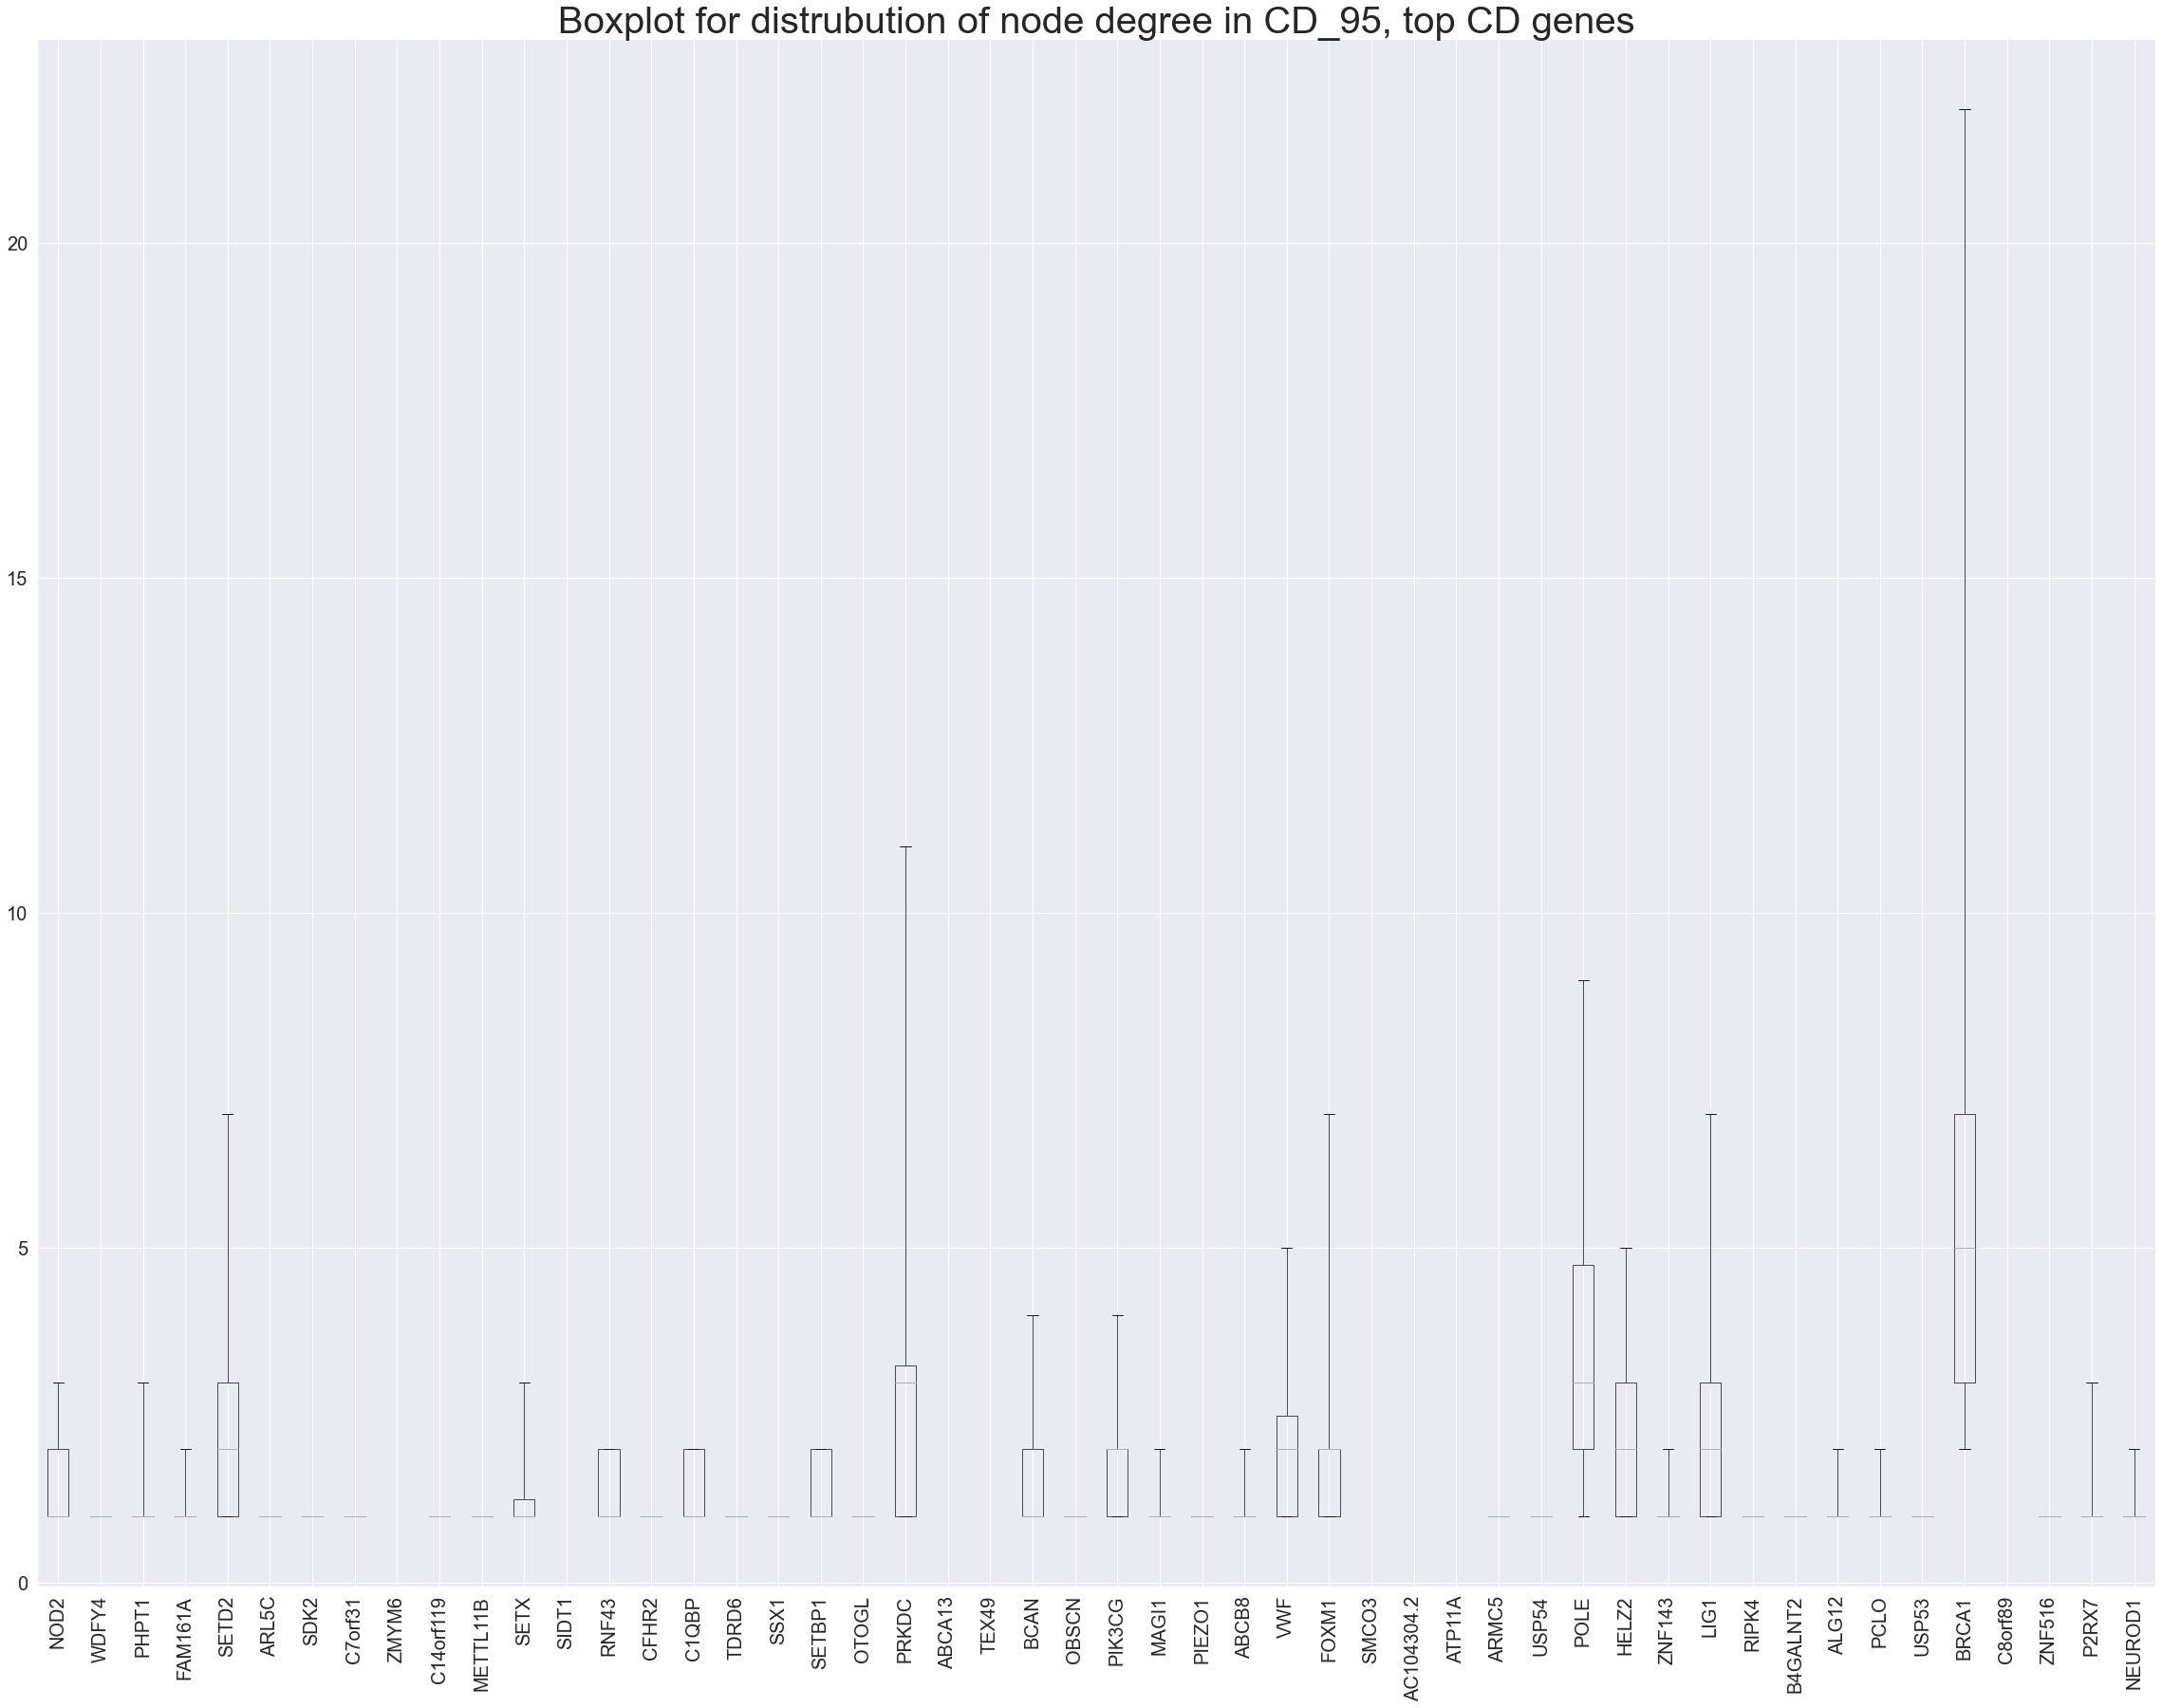

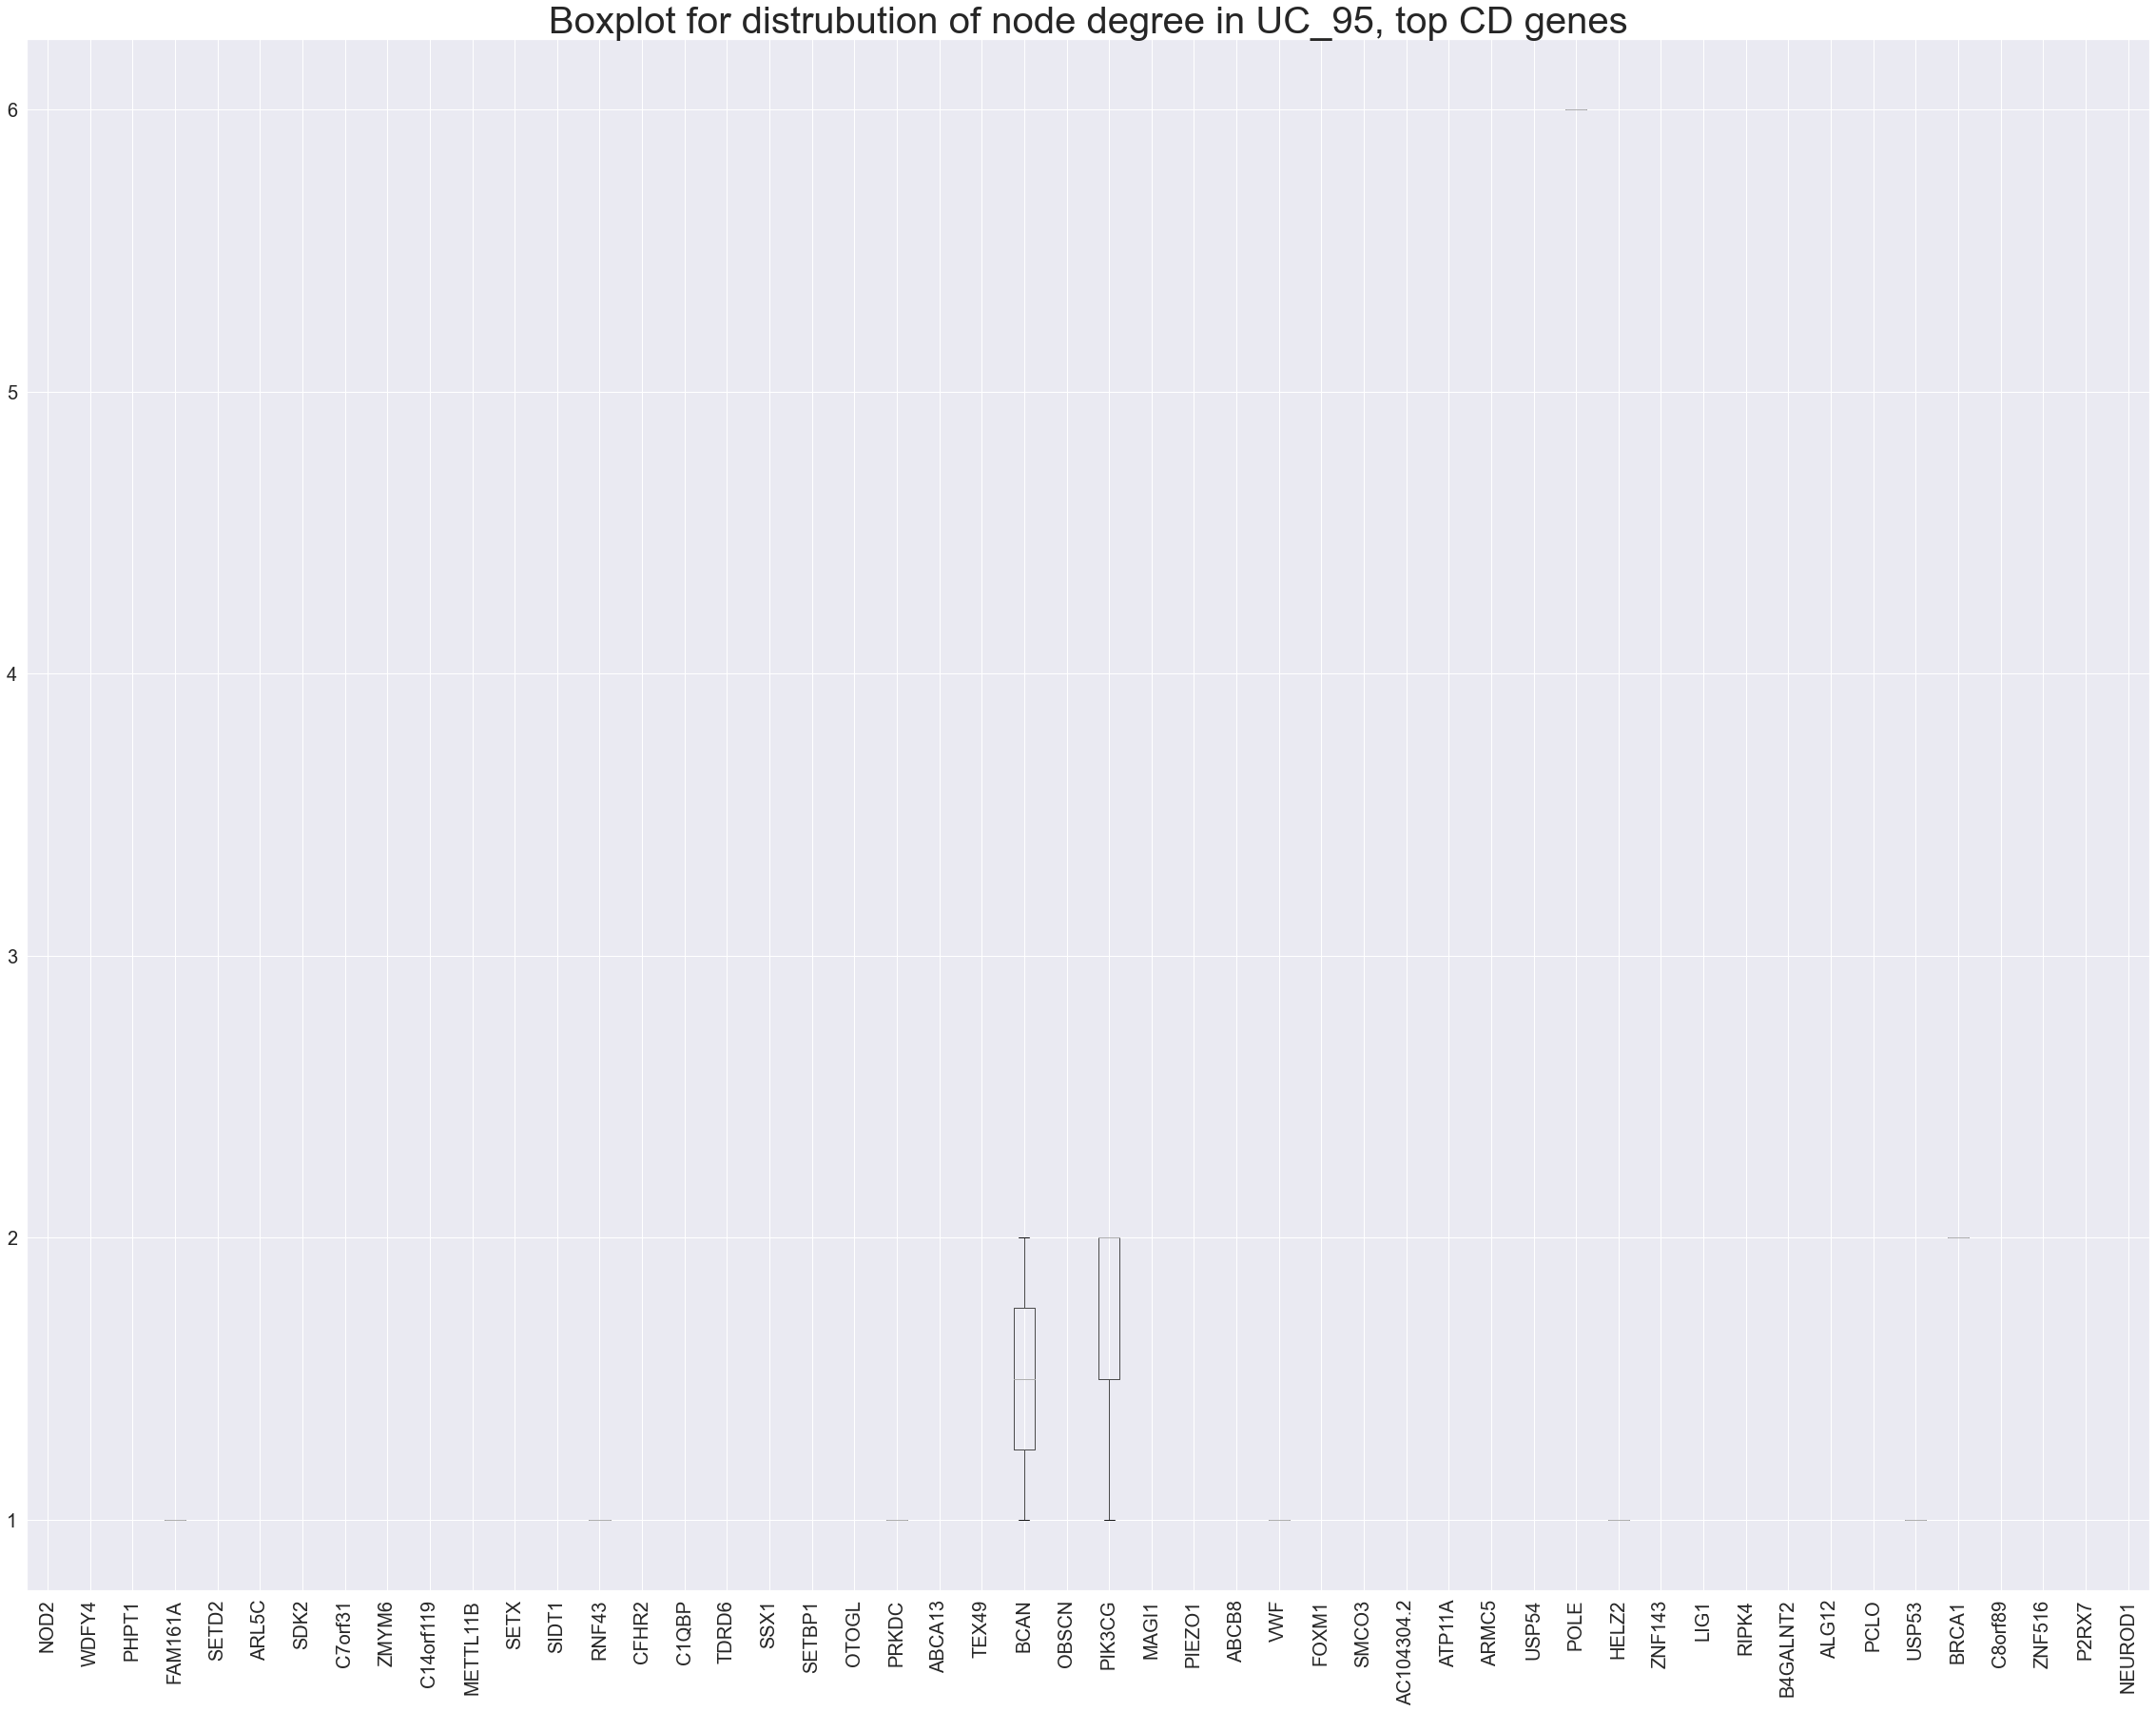

In [10]:
get_network_analysis.create_boxplot(CD_95_ND[CD_95_ND>0], top_CD_bin_95, name='CD_95, top CD genes',save=True)
get_network_analysis.create_boxplot(UC_95_ND[UC_95_ND>0], top_CD_bin_95, name='UC_95, top CD genes',save=True)


In [19]:
CD_95_ND['NOD2'].sort_values(ascending=False).head(47).value_counts()

0.0    22
1.0    16
2.0     7
3.0     2
Name: NOD2, dtype: int64

### total node degree

In [80]:
from get_data import genepy_df

for i in genepy_df.columns:
    if 'PDE11A' in i:
        print(i)

PDE11A_ENSG00000128655
PDE11A_ENSG00000284741


In [22]:
import pandas as pd

In [23]:
def get_total_degree_from_multigraph(multigraph):
    dic = dict(multigraph.degree(list(multigraph.nodes)))
    return pd.Series(data=dic).sort_values(ascending=False)

In [67]:
CD_95_ND_top = get_total_degree_from_multigraph(CD_95_MG)

CD_95_ND_top[CD_95_ND_top.index.duplicated()]

Series([], dtype: int64)

In [66]:
CD_bin_95_sum_topND['PDE11A']

PDE11A    15
PDE11A     5
dtype: int64

In [76]:
genepy_df = get_data.remove_ensembl_IDs(genepy_df)
genepy_df['PDE11A']

PDE11A    295.416362
PDE11A     15.635156
dtype: float64

In [85]:
CD_bin_95_sum_topND = CD_bin_95.sum()[CD_95_ND_top.index]
CD_bin_95_sum_topND[CD_bin_95_sum_topND.index.duplicated()]

PDE11A    5
dtype: int64

In [93]:
idx = CD_bin_95_sum_topND.index.drop_duplicates()
CD_bin_95_sum_topND[idx]

TypeError: bad operand type for unary ~: 'Index'

In [90]:
CD_bin_95_sum_topND = CD_bin_95_sum_topND[CD_bin_95_sum_topND.index.drop_duplicates()]
CD_bin_95_sum_topND['PDE11A']

PDE11A    15
PDE11A     5
dtype: int64

In [88]:
df3 = pd.concat([CD_95_ND_top, CD_bin_95_sum_topND], axis=1)

ValueError: cannot reindex from a duplicate axis

In [42]:
df2.columns = ["Total Node degree", "No. of Patients"]

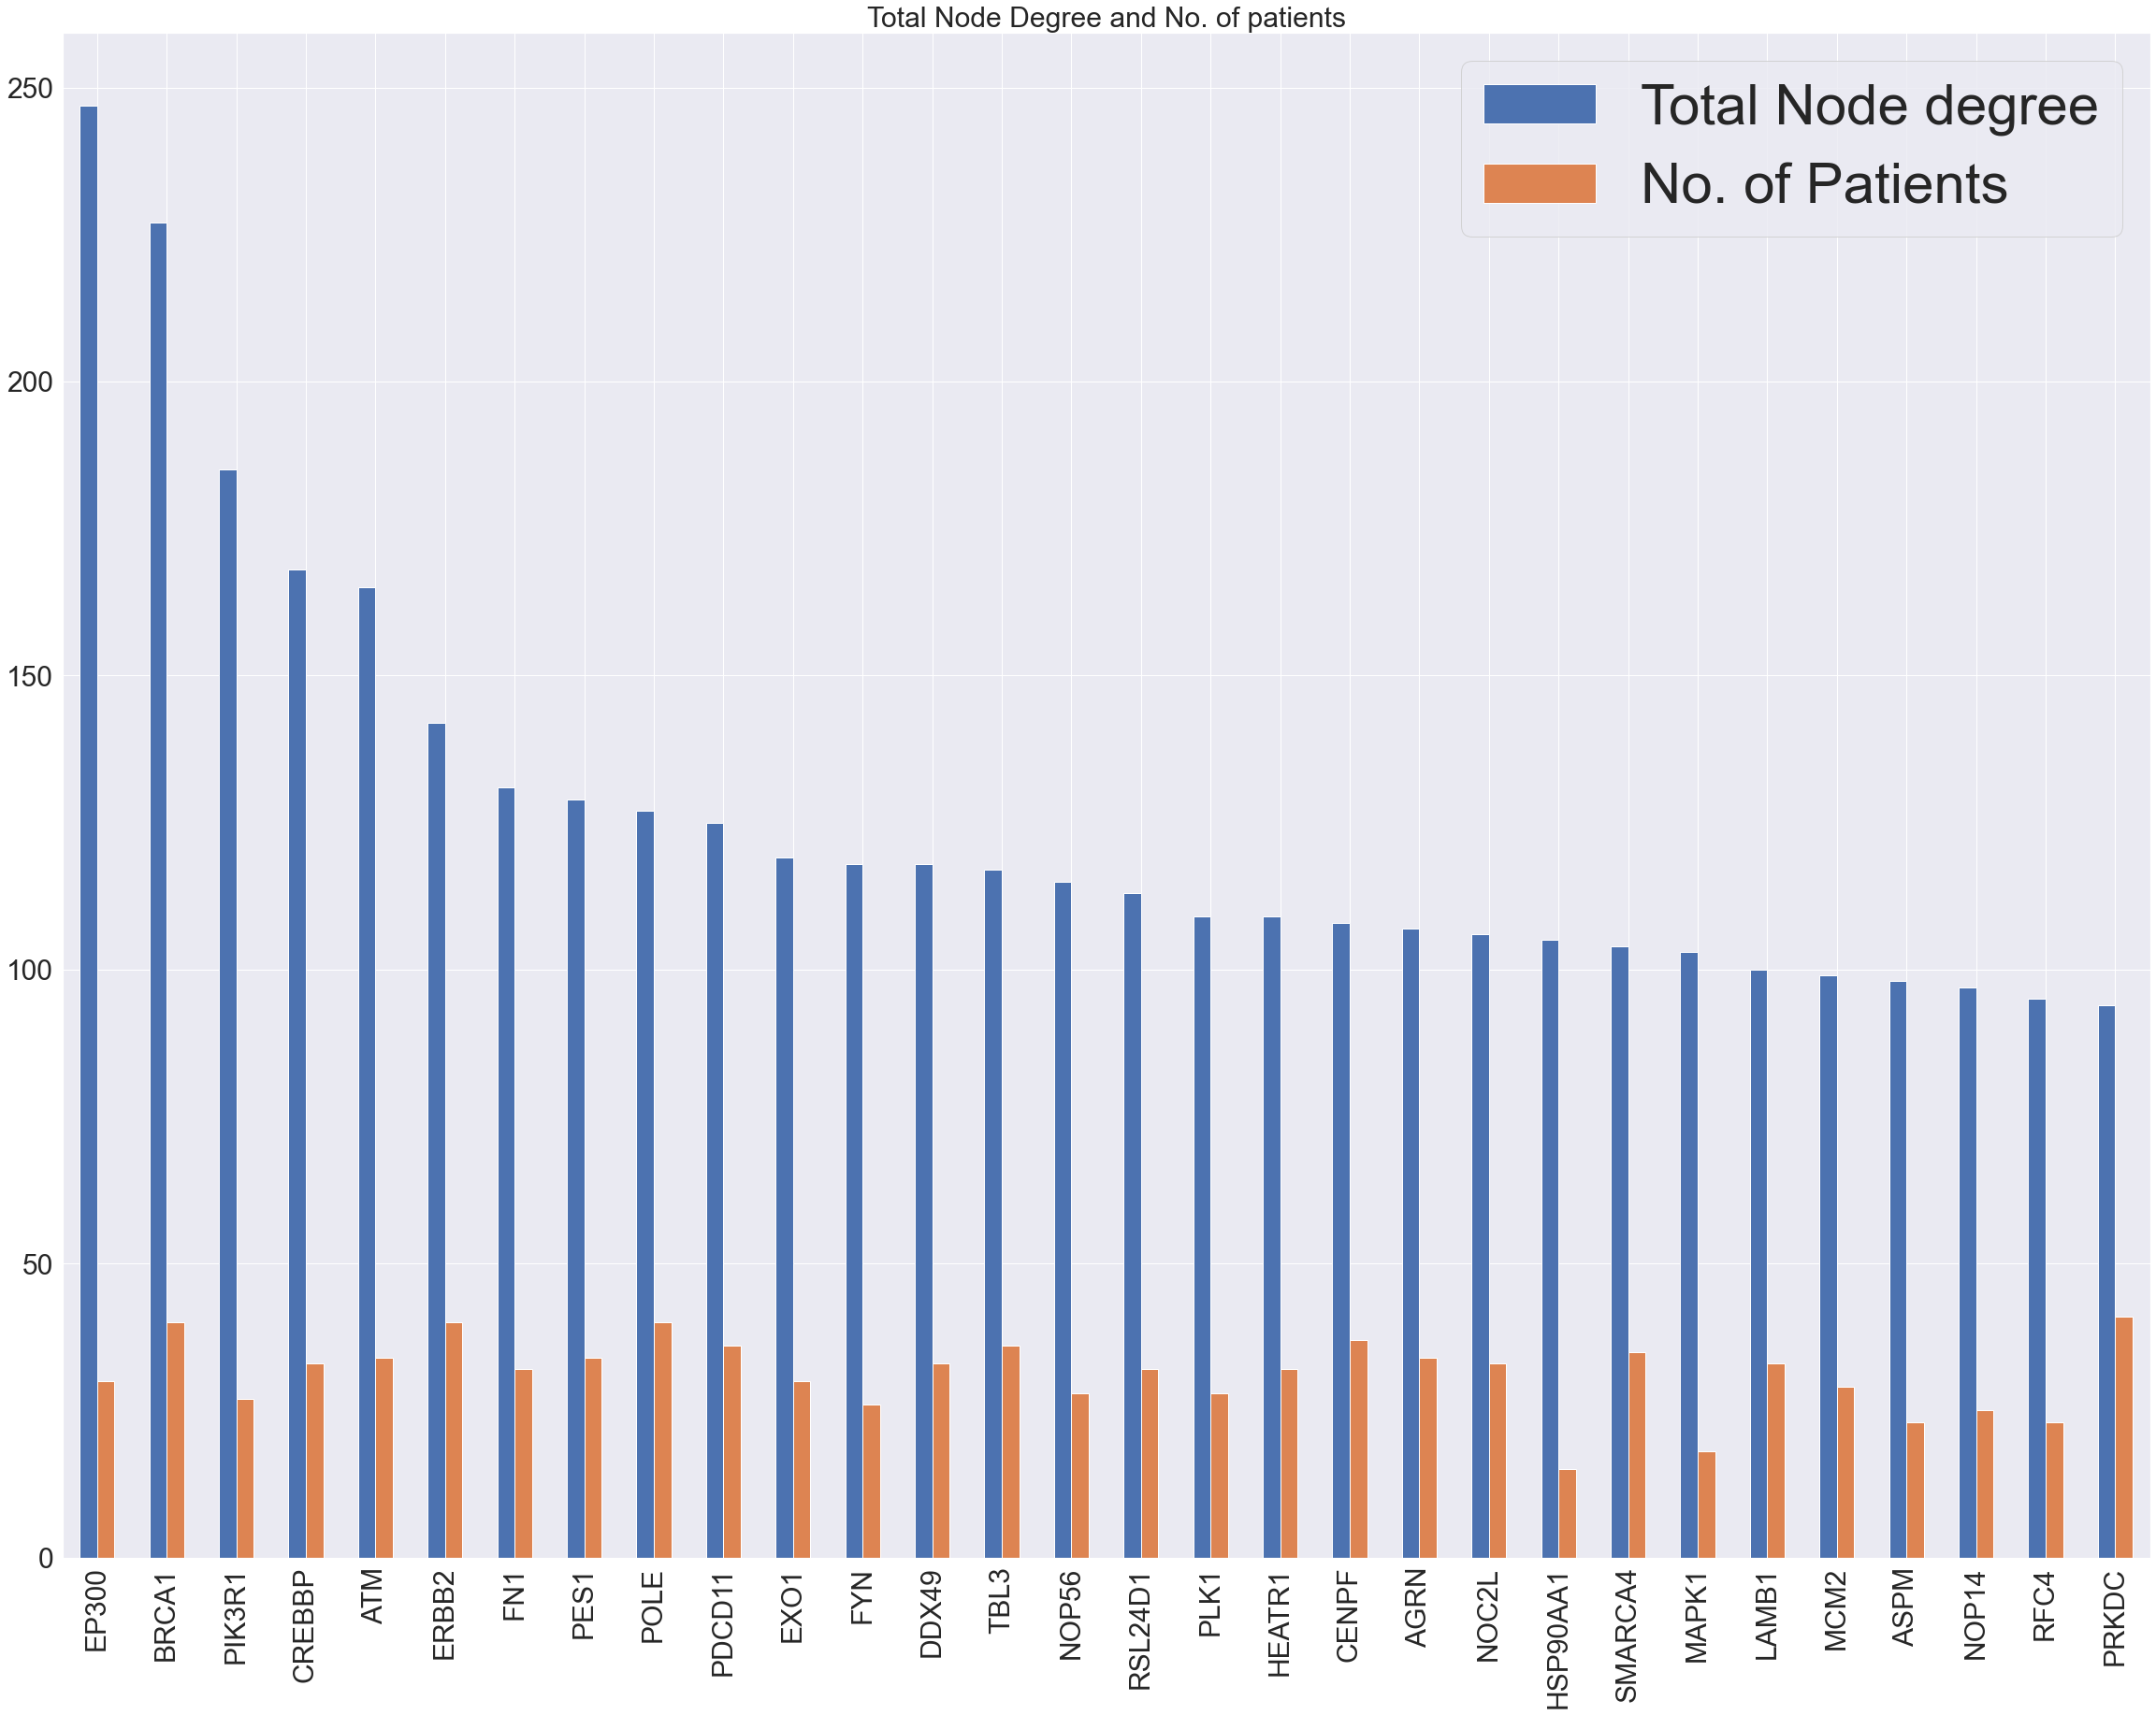

In [101]:
# CD_95
sns.set(rc = {'figure.figsize':(40,30)})
#title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.')
ax = df2.plot.bar(fontsize=30)
ax.legend(prop={'size': 60})
ax.set_title('Total Node Degree and No. of patients', size=30)
ax.figure.savefig('TopCD_95_ND_Bar.png')

In [119]:
# UC _95

UC_95_ND_top = get_total_degree_from_multigraph(UC_95_MG).head(30)
UC_bin_95_sum_topND = UC_bin_95.sum()[UC_95_ND_top.index]

df_UC = pd.concat([UC_95_ND_top, UC_bin_95_sum_topND], axis=1)
df_UC.columns = ["Total Node degree", "No. of Patients"]

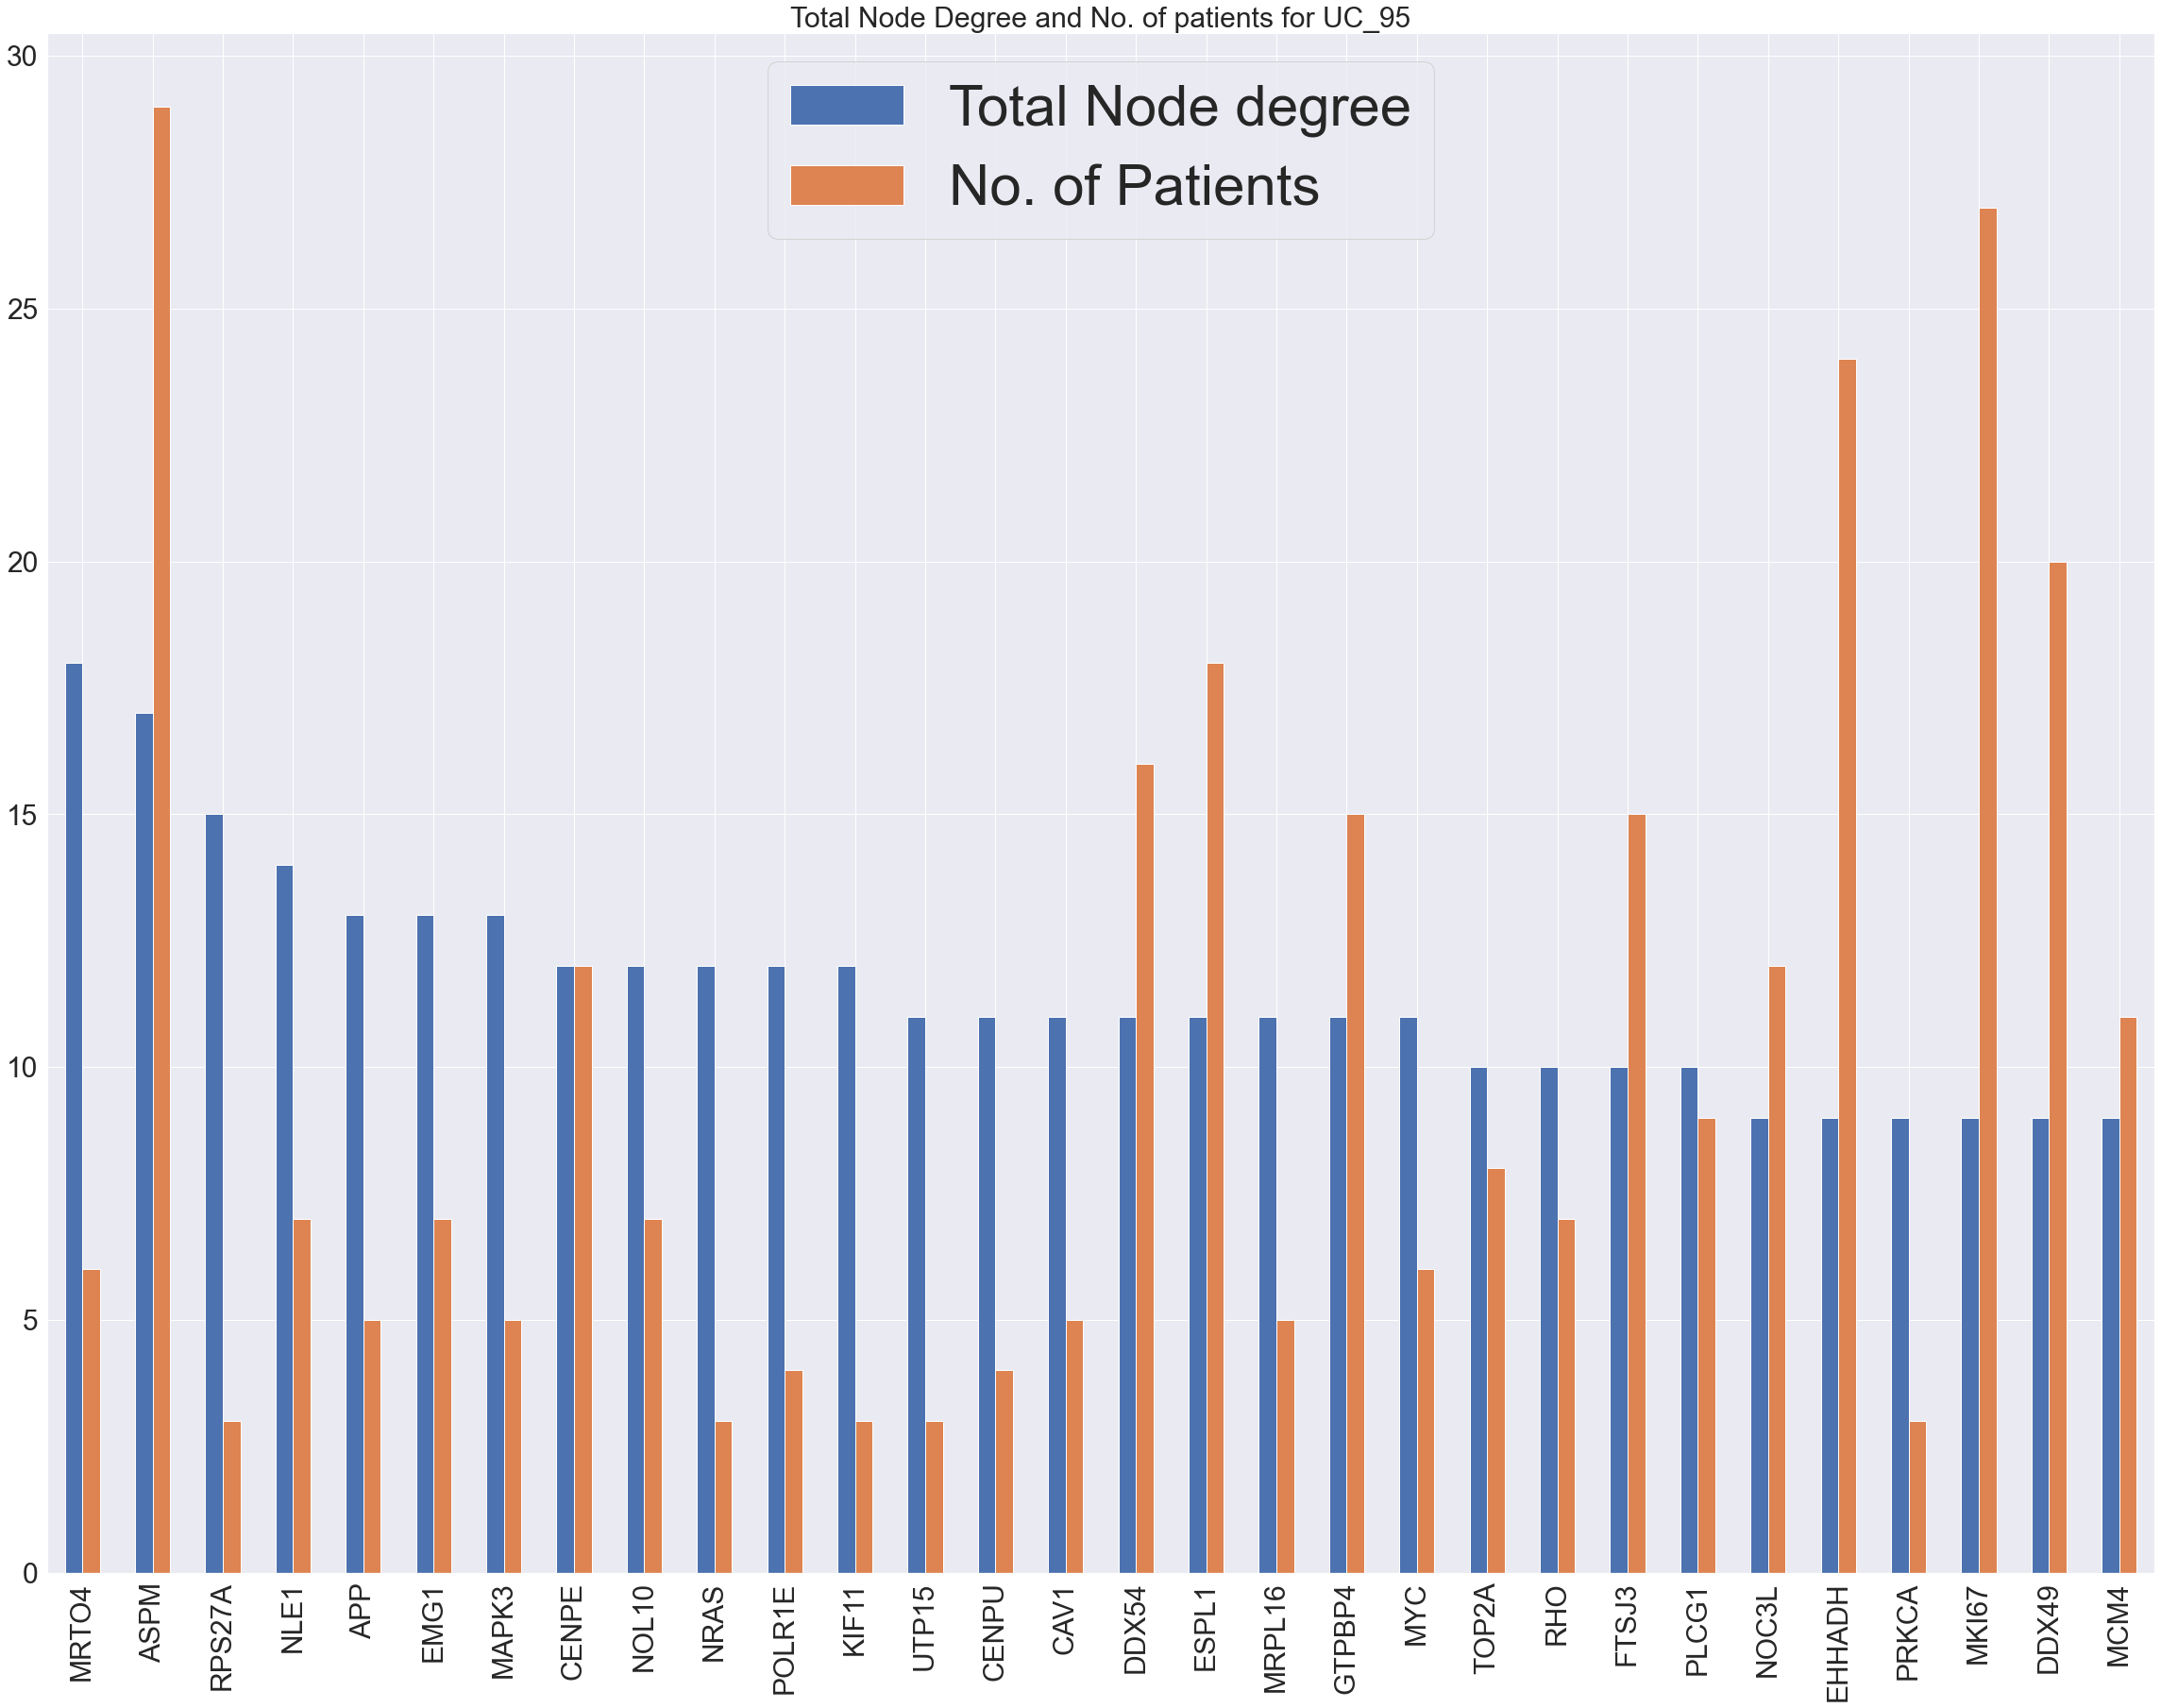

In [120]:
# UC_95
sns.set(rc = {'figure.figsize':(40,30)})
#title('Top Scoring Genes in CD Cohort AFTER normalised and weighted by LOEUF. NOD2 Added for reference.')
ax = df_UC.plot.bar(fontsize=30)
ax.legend(prop={'size': 60})
ax.set_title('Total Node Degree and No. of patients for UC_95', size=30)
ax.figure.savefig('TopUC_95_ND_Bar.png')

In [121]:
df_UC

,Total Node degree,No. of Patients
MRTO4,18,6
ASPM,17,29
RPS27A,15,3
NLE1,14,7
APP,13,5
EMG1,13,7
MAPK3,13,5
CENPE,12,12
NOL10,12,7
NRAS,12,3


### betweeness centrality

In [106]:
dict1 = nx.betweenness_centrality(CD_95_GL[0])
dict2 = nx.betweenness_centrality(CD_95_GL[1])
s1 = pd.Series(dict1)
s2 = pd.Series(dict2)

df_bc = pd.concat([s1,s2],axis=1)
df_bc.fillna(0).T

,CRY1,PPP2R1B,PRKAG3,OTC,GPT,CLPP,PITRM1,OSGEP,SLC26A4,APMAP,...,UNC93A,UNKL,VPS4A,ZBTB49,ZFP69B,ZNF189,ZNF214,ZNF221,ZNF648,ZNF770
0,0.0,0.00149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
def betweeness_centrality(graph_list):
    df_betweeness_central = pd.DataFrame(dtype='float64')
    for graph in graph_list:
        BC_Series = pd.Series(nx.betweenness_centrality(graph),
                           name=graph.name)
        df_betweeness_central = pd.concat([df_betweeness_central, BC_Series],
                                          axis=1)
    df_betweeness_central = df_betweeness_central.fillna(0).T
    return df_betweeness_central

In [110]:
CD_95_BC = betweeness_centrality(CD_95_GL)

In [124]:
CD_95_BC.sum().sort_values(ascending=False).head(50)

EP300       0.111143
BRCA1       0.106297
PIK3R1      0.098152
CREBBP      0.078398
ERBB2       0.077420
HSP90AA1    0.075295
CDH1        0.062307
ESR1        0.058855
MAPK1       0.058433
PRKCB       0.051085
EGF         0.049369
HIF1A       0.049159
FN1         0.042857
NOTCH1      0.042015
FYN         0.041958
ATM         0.041130
ITGB3       0.040697
PRKDC       0.039885
POLR2A      0.037163
PARP1       0.036543
BECN1       0.035722
MYC         0.035579
FLNA        0.033424
PRKACA      0.033282
CFTR        0.032213
CCNA2       0.032026
SMARCA4     0.031724
PTEN        0.030401
CCN1        0.030286
FOXO1       0.029579
HSPG2       0.029511
BRCA2       0.029187
HSPA4       0.028712
BCAR1       0.027498
UBA52       0.027166
LAMB1       0.027093
MTOR        0.026718
NCOR1       0.026710
PGR         0.026620
KDR         0.025538
STUB1       0.025510
IRS1        0.025193
PXN         0.025160
EGFR        0.024774
LRRK2       0.024753
HDAC6       0.024496
HTT         0.023659
SYK         0

In [125]:
UC_95_BC = betweeness_centrality(UC_95_GL)
UC_95_BC.sum().sort_values(ascending=False).head(50)

PRKCA       0.001843
RPS27A      0.001608
RFC5        0.001367
RHO         0.001252
NCAM1       0.001156
TUBB2A      0.001146
SAG         0.001123
GFRA1       0.001078
H2BC11      0.001072
DDB2        0.001026
CKAP5       0.000975
CENPE       0.000965
MAPK3       0.000949
FN1         0.000884
ITGA6       0.000838
FANCA       0.000780
ASPM        0.000755
SKP1        0.000728
MUS81       0.000700
PARVB       0.000644
TP53BP1     0.000644
PLCG1       0.000633
ITGAX       0.000605
TLN1        0.000599
H4C13       0.000593
GSTK1       0.000583
MYBBP1A     0.000567
EHHADH      0.000479
CDCA3       0.000453
MYC         0.000446
POLR1E      0.000430
MCM5        0.000422
MCM10       0.000422
SRC         0.000412
AURKB       0.000397
IMP3        0.000369
NRAS        0.000333
CSF1        0.000318
ACAT1       0.000312
TIA1        0.000312
RAD51AP1    0.000312
H4C3        0.000294
POLR1B      0.000289
APP         0.000289
UHRF1       0.000287
FTSJ3       0.000279
TINF2       0.000279
BABAM2      0

## intersect

In [ ]:
CD_95_compose = nx.compose_all(CD_95_GL)

## Testing to add score into import function

In [34]:
def create_graph_list_from_directory(directory, score=0.7):
    Glist = []
    filelist = [f for f in os.listdir(directory) if not f.startswith('.')]
    if "CD" in directory:
        if "99" in directory:
            p_df = CD_bin_99
        if "97_5" in directory:
            p_df = CD_bin_97_5
        if "95" in directory:
            p_df = CD_bin_95 
    else: 
        if "99" in directory:
            p_df = UC_bin_99
        if "97_5" in directory:
            p_df = UC_bin_97_5
        if "95" in directory:
            p_df = UC_bin_95
    for file in filelist:
        patient_name = file.split(".")[0]
        G = nx.Graph(name=patient_name)
        G.add_nodes_from([gene.split("_")[0] for gene in get_patient.get_genes_above_zero(p_df,patient_name)])
        patient_edges = nx.read_weighted_edgelist(directory+file,
                                                  delimiter = "\t",
                                                  encoding='utf-8').edges
        G.add_edges_from([(u,v,e) for u,v,e in patient_edges.data('weight') if e >= score],)
        Glist.append(G)
    return Glist

In [35]:
create_graph_list_from_directory(directory)[0].edges.data()

TypeError: 'float' object is not iterable

In [2]:
import networkx as nx
directory = "patient_networks/UC_99_network_3/"
file = "AP0045.txt"

patient_edges = nx.read_weighted_edgelist(directory+file,
                                          delimiter = "\t",
                                          encoding='utf-8').edges
'''
G.add_weighted_edges_from(patient_edges.data('weight'),name = patient_name)
'''

"\nG.add_weighted_edges_from(patient_edges.data('weight'),name = patient_name)\n"

In [10]:
[(u,v,e) for u,v,e in patient_edges.data('weight') if e >= 0.7]


[('KCND1', 'KCNAB3', 0.803),
 ('KCNA5', 'KCNAB3', 0.927),
 ('CSK', 'PXN', 0.999),
 ('ESPL1', 'INCENP', 0.765),
 ('ESPL1', 'TIMELESS', 0.835),
 ('ESPL1', 'CDCA3', 0.883),
 ('ACIN1', 'HNRNPU', 0.898)]

In [73]:
for n, nbrsdict in G.adjacency():
    for nbr, keydict in nbrsdict.items():
        for key, eattr in keydict.items():
            if 'weight' in eattr.items():
                
                
    

SyntaxError: unexpected EOF while parsing (3193920111.py, line 7)

In [76]:
def get_multigraph_edges_with_weight(graph, edge_weight=0.7):
    selected_edges = [(u,v) for u,v,e in graph.edges(data=True) if e['weight'] < 0.7]
    graph = graph.remove_edges_from(selected_edges)
    return(graph)

In [79]:
G = get_multigraph_edges_with_weight(G)
G

AttributeError: 'NoneType' object has no attribute 'edges'

In [78]:
G.edges.data()

AttributeError: 'NoneType' object has no attribute 'edges'

In [53]:
file = "AP0045.txt"
patient_edges = nx.read_weighted_edgelist(directory+file,
                                          delimiter = "\t",
                                          encoding='utf-8').edges.data()

In [54]:
patient_edges

EdgeDataView([('HEATR6', 'DNAAF5', {'weight': 0.611}), ('KCND1', 'KCNA5', {'weight': 0.622}), ('KCND1', 'KCNAB3', {'weight': 0.803}), ('KCNA5', 'KCNAB3', {'weight': 0.927}), ('CSK', 'INPPL1', {'weight': 0.46}), ('CSK', 'ZC3HAV1', {'weight': 0.6}), ('CSK', 'PXN', {'weight': 0.999}), ('ESPL1', 'INCENP', {'weight': 0.765}), ('ESPL1', 'TIMELESS', {'weight': 0.835}), ('ESPL1', 'CDCA3', {'weight': 0.883}), ('INCENP', 'CDCA3', {'weight': 0.67}), ('ACIN1', 'CASC3', {'weight': 0.47}), ('ACIN1', 'HNRNPU', {'weight': 0.898}), ('TIMM44', 'MRPL1', {'weight': 0.527}), ('FMNL1', 'MYO9A', {'weight': 0.408}), ('SFN', 'KRT8', {'weight': 0.669}), ('KRT8', 'NCAM1', {'weight': 0.506})])

In [ ]:
for u, v, weight in G.edges.data():
    print(weight)

for n, nbrsdict in G.adjacency():
    for nbr in nbrsdict.items():
        print(nbr)
        

In [ ]:
for nbr, edgesdict in G.adj.items():
    for info in edgesdict.items():
        print(info)

In [28]:
g = get_edges_with_weight(G)
g

In [27]:
def get_edges_with_weight(graph, edge_weight=0.7):
    edge_list = []
    for u, v, weight in graph.edges.data("weight"):
        if weight < edge_weight:
            edge_list.append((u,v,weight))
        else:
            continue
    graph = graph.remove_edges_from(edge_list)
    return graph

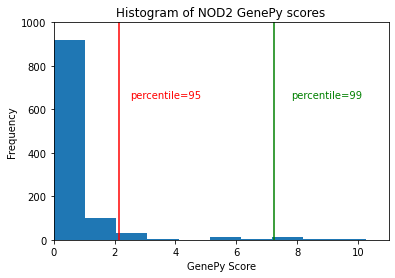

<Figure size 432x288 with 0 Axes>

In [33]:
n, bins, patches = plt.hist(NOD2_series)


plt.xlabel('GenePy Score')
plt.ylabel('Frequency')
plt.title('Histogram of NOD2 GenePy scores')
plt.xlim(0, 11)
plt.ylim(0, 1000)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NOD2"],95), color='r')
plt.text(2.5, 650, r'percentile=95', color='r')
plt.axvline(np.percentile(genepy_df["NOD2"],99), color='g')
plt.text(7.8, 650, r'percentile=99', color='g')
plt.show()
plt.savefig("NOD2_Percentile.png",dpi=300)

In [ ]:
directory = "patient_networks/UC_99_network_3/"
file = "AP0045.txt"

In [ ]:


nx.read_weighted_edgelist(directory+file,
                          delimiter = "\t",
                          encoding='utf-8').edges.data('weight')

In [ ]:
UC_99_MG.edges(data="weight", keys=True)

In [ ]:
UC_99_MG_07 = get_network_analysis.get_edges_with_weight(UC_99_MG)
list(UC_99_MG.edges(data=True))

In [20]:
G = nx.MultiGraph(subgroup = directory.split("/")[1], key=True)
nx.read_weighted_edgelist(directory+file,
                          delimiter = "\t",
                          encoding='utf-8').edges(key='AP')

TypeError: __call__() got an unexpected keyword argument 'key'

In [ ]:
import cytoscape

cytoscape.view_networkx_in_cytoscape(UC_99_MG)

In [ ]:
G = nx.MultiGraph(subgroup = directory.split("/")[1])
G.add_weighted_edges_from(nx.read_weighted_edgelist(directory+file,
                                                    delimiter = "\t",
                                                    encoding='utf-8').edges.data('weight'),
                          name = file)

In [ ]:
list(G.edges(data=True))

In [12]:
import json

with open('UC_99_MG.js', 'w') as outfile:
    json.dump(nx.cytoscape_data(UC_99_MG), outfile)

In [14]:
dict1 = nx.cytoscape_data(UC_99_MG)

out_file = open("UC_99_MG.cyjs", "w") 

json.dump(dict1, out_file, indent = 6) 
    
out_file.close() 

## Check missing patients

- [x] Create function to find missing patient_networks 
- [ ] Need to check networks
    - CD_95 many missing but CD_97_5 and CD_99 none are missing

In [11]:
import get_patient_networks

ModuleNotFoundError: No module named 'binerised'

In [24]:
import os
# List directory

def get_missing_patients(directory):
    if "CD" in directory:
        if "99" in directory:
            p_df = CD_bin_99
        if "97_5" in directory:
            p_df = CD_bin_97_5
        if "95" in directory:
            p_df = CD_bin_95 
    else: 
        if "99" in directory:
            p_df = UC_bin_99
        if "97_5" in directory:
            p_df = UC_bin_97_5
        if "95" in directory:
            p_df = UC_bin_95
    patient_network_list = [filename.split('.')[0] for filename in os.listdir(directory)]
    return[patient for patient in p_df.index if patient not in patient_network_list]

In [23]:
def get_number_of_disease_genes(list_of_patients, reference_df):
    dictionary = {}
    for i in list_of_patients:
        dictionary[i] = reference_df.loc[i,:].sum()
    return dictionary

get_number_of_disease_genes(get_missing_patients(directory), CD_bin_95)

{}

In [21]:
def get_number_of_disease_genes_for_missing_patient_networks(directory):
    if "CD" in directory:
        if "99" in directory:
            p_df = CD_bin_99
        elif "97_5" in directory:
            p_df = CD_bin_97_5
        elif "95" in directory:
            p_df = CD_bin_95 
    elif "UC" in directory: 
        if "99" in directory:
            p_df = UC_bin_99
        elif "97_5" in directory:
            p_df = UC_bin_97_5
        elif "95" in directory:
            p_df = UC_bin_95
    return get_number_of_disease_genes(get_missing_patients(directory),
                                       p_df)

In [32]:
directory = 'patient_networks/UC_95_network_3/'

get_number_of_disease_genes_for_missing_patient_networks(directory)

{'PR0071': 281,
 'PR0072': 266,
 'PR0075': 288,
 'PR0077': 262,
 'PR0080': 271,
 'PR0096': 250,
 'PR0100': 281,
 'SOPR0485': 302,
 'SOPR0487': 244}

In [69]:
directory = 'patient_networks/CD_97_5_network_3/'

get_number_of_disease_genes_for_missing_patient_networks(directory)

{}

In [82]:
get_network_analysis.get_patient_graph('AP0120', CD_95_GL).nodes

AttributeError: 'NoneType' object has no attribute 'nodes'

### get list of disease genes for missing patients

In [4]:
lines = get_patient.get_genes_above_zero(CD_bin_95, 'AP0120')

In [5]:
with open('AP0120_disease_genes.txt', 'w') as f:
    for line in lines:
        f.write(f"{line}\n")

In [13]:
directory = "patient_networks/CD_95_network_3/"

CD_95_missing = get_missing_patients(directory)
CD_95_missing

['AP0120',
 'PR0003',
 'PR0004',
 'PR0005',
 'PR0097',
 'PR0098',
 'PR0116',
 'PR0118',
 'PR0119',
 'PR0137',
 'SOAD0015',
 'SOAD0016',
 'SOAD0079',
 'SOAD0105',
 'SOAD0107',
 'SOAD0334',
 'SOAD0467',
 'SOPR0258',
 'SOPR0259',
 'SOPR0262',
 'SOPR0295',
 'SOPR0296',
 'SOPR0306',
 'SORL0035']

In [11]:
import get_PPI
import pandas as pd

def create_patient_networks(i, df):
    patient_net = get_PPI.get_PPI_df(df, i)
    edge_data = {'source': patient_net["preferredName_A"],
                 'target': patient_net["preferredName_B"],
                 'String_Score': patient_net["score"]
                }
    edges = pd.DataFrame(data=edge_data, columns=['source', 'target', 'String_Score'])
    edges.to_csv("patient_networks/CD_95_missing/patient_"+str(i)+".txt",
                 sep="\t",
                 header=False,
                 index=False)
    return

In [12]:
for i in CD_95_missing:
    create_patient_networks(i, CD_bin_95)

In [19]:
patient_net = get_PPI.get_PPI_df(CD_bin_95, 'AP0120')

edge_data = {'source': patient_net["preferredName_A"],
             'target': patient_net["preferredName_B"],
             'String_Score': patient_net["score"]
            }
edges = pd.DataFrame(data=edge_data, columns=['source', 'target', 'String_Score'])
edges.to_csv("patient_networks/CD_95_missing/patient_AP0120.txt",
             sep="\t",
             header=False,
             index=False)

ConnectionError: HTTPSConnectionPool(host='version-11-5.string-db.org', port=443): Max retries exceeded with url: /api/tsv-no-header/network (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fae642964c0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [17]:
CD_bin_95.loc['AP0120']

A1BG       0
A1CF       0
A2ML1      0
A2M        0
A3GALT2    0
          ..
ZYG11A     0
ZYG11B     0
ZYX        0
ZZEF1      0
ZZZ3       0
Name: AP0120, Length: 16472, dtype: int64

### Tests

In [ ]:
directory = 'patient_networks/CD_95_network_3/'
filelist = os.listdir(directory)


patient_network_list = [filename.split('.')[0] for filename in os.listdir(directory)]
[patient for patient in UC_bin_95.index if patient not in patient_network_list]

# TESTS for Documenting code

In [16]:
get_data.get_diagnosis('CD')

IID
AP0013       True
AP0030       True
AP0045      False
AP0046      False
AP0055      False
            ...  
SORL0038    False
SORL0039     True
SORL0040    False
SORL0041    False
SORL0042    False
Name: Diagnosis, Length: 1086, dtype: bool